<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cars_df = pd.read_csv('/content/drive/MyDrive/cars.csv')

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [4]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [6]:
data_types = cars_df.dtypes
data_types

,0
Car_ID,int64
Brand,object
Model,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,int64
Engine,int64


In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [10]:
# Загальна інформація про DataFrame
cars_df.info(verbose=True)

# Кількість відсутніх значень у кожному стовпці
missing_values = cars_df.isnull().sum()
print("\nКількість відсутніх значень у кожній колонці:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB

Кількість відсутніх значень у кожній колонці:
Car_ID               0
Brand                0
Model                0
Year                 0
K

In [12]:
cars_df.select_dtypes(include=['object']).columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [13]:
len(cars_df.select_dtypes(include=['object']).columns)

5

In [14]:
number_df = cars_df.select_dtypes(include=['number']).columns
number_df

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [15]:
len(number_df)

8

In [18]:
categorical_columns = cars_df.select_dtypes(include='object').columns
unique_values_info = {
    col: {
        "Unique Values": cars_df[col].unique(),
        "Count": cars_df[col].nunique()
    } for col in categorical_columns
}
unique_values_info

{'Brand': {'Unique Values': array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
         'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object),
  'Count': 11},
 'Model': {'Unique Values': array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
         'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
         'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
         'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
         'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
         'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
         'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
         'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
         'Innova Crysta', 'EcoSport'], dtype=object),
  'Count': 58},
 'Fuel_Type': {'Unique Values': array(['Petrol', 'Diesel'], dtype=object),
  'Count': 2},
 'Transmission': {'Unique Values': array(['Manual

Типи даних колонок:
Числові - Car_ID, Year, Kilometers_Driven, Mileage та інше.
Категоріальні - Brand, Model, Fuel_Type, Transmission, Owner_Type.
Деталі категоріальних колонок:
Brand:
Унікальні значення: 11 (наприклад, Toyota, Honda, Ford).
Тип: мультикатегоріальна без порядку.
Числові колонки: 8.
Категоріальні колонки:
Бінарні: 2 (Fuel_Type, Transmission).
Мультикатегоріальні без порядку: 2 (Brand, Model).
Мультикатегоріальні з порядком: 1 (Owner_Type).

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [34]:
X = cars_df.drop(columns=['Price'])
y = cars_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [29]:
binary_columns = ['Fuel_Type', 'Transmission']
for col in binary_columns:
    # Assign 1 to the category with the majority of values
    majority_class = cars_df[col].value_counts().idxmax()
    cars_df[col] = (cars_df[col] == majority_class).astype(int)
cars_df[binary_columns].head(), cars_df[binary_columns].value_counts()

(   Fuel_Type  Transmission
 0          1             0
 1          1             1
 2          1             1
 3          0             0
 4          0             1,
 Fuel_Type  Transmission
 0          1               29
 1          1               28
            0               24
 0          0               19
 Name: count, dtype: int64)

In [35]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, drop='first')


brand_encoded_train = encoder.fit_transform(X_train[['Brand']])


brand_encoded_test = encoder.transform(X_test[['Brand']])


brand_encoded_train_df = pd.DataFrame(brand_encoded_train, columns=encoder.get_feature_names_out(['Brand']))
brand_encoded_test_df = pd.DataFrame(brand_encoded_test, columns=encoder.get_feature_names_out(['Brand']))

brand_encoded_train_df.index = X_train.index
brand_encoded_test_df.index = X_test.index


X_train = pd.concat([X_train.drop(columns=['Brand']), brand_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Brand']), brand_encoded_test_df], axis=1)


X_train.head(), X_test.head()




(    Car_ID  Model  Year  Kilometers_Driven  Fuel_Type  Transmission  \
 83      84  T-Roc  2019              22000          1             1   
 55      56     A5  2018              28000          0             1   
 26      27     A6  2018              28000          1             1   
 54      55  Vento  2017              32000          1             0   
 19      20    GLC  2017              26000          1             1   
 
    Owner_Type  Mileage  Engine  Power  ...  Brand_BMW  Brand_Ford  \
 83     Second       18    1498    148  ...        0.0         0.0   
 55      First       17    1968    187  ...        0.0         0.0   
 26      First       15    1984    241  ...        0.0         0.0   
 54     Second       18    1598    103  ...        0.0         0.0   
 19     Second       12    1991    241  ...        0.0         0.0   
 
     Brand_Honda  Brand_Hyundai  Brand_Mahindra  Brand_Maruti  Brand_Mercedes  \
 83          0.0            0.0             0.0           0.0  

In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [37]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,0,1,First,17,1968,187,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,1,1,First,15,1984,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,1,1,Second,15,1395,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [39]:
X_train_numeric = X_train.select_dtypes(include=['number'])

train_data_with_target = pd.concat([X_train_numeric, y_train], axis=1)

correlation_matrix = train_data_with_target.corr()

target_correlations = correlation_matrix['Price'].abs().sort_values(ascending=False)
strong_correlations = target_correlations[target_correlations > 0.5]

correlation_matrix, strong_correlations


(                     Car_ID      Year  Kilometers_Driven  Fuel_Type  \
 Car_ID             1.000000  0.137027          -0.356614   0.090537   
 Year               0.137027  1.000000          -0.708525   0.248515   
 Kilometers_Driven -0.356614 -0.708525           1.000000  -0.332351   
 Fuel_Type          0.090537  0.248515          -0.332351   1.000000   
 Transmission      -0.084381 -0.200603          -0.066491  -0.005775   
 Mileage            0.100891  0.278559          -0.126621  -0.070112   
 Engine            -0.089284 -0.392764           0.101219  -0.174455   
 Power             -0.006319 -0.248442          -0.060803   0.076357   
 Seats             -0.063793 -0.278755           0.403656  -0.412468   
 Brand_BMW          0.048335  0.202517          -0.247042  -0.048475   
 Brand_Ford        -0.020240 -0.150454          -0.009761   0.109812   
 Brand_Honda       -0.050809 -0.037437           0.057372  -0.161425   
 Brand_Hyundai      0.016831 -0.092099           0.154362  -0.00

Price із коефіцієнтом більше 0.5 за модулем:

Power: кореляція 0.849137 (сильна позитивна кореляція).

Engine: кореляція 0.710561 (сильна позитивна кореляція).

Transmission: кореляція 0.680731 (сильна позитивна кореляція).

Mileage: кореляція 0.638404 (сильна позитивна кореляція).

Ці змінні можуть мати значний вплив на прогнозування ціни автомобіля (Price) та є важливими для побудови моделі.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [40]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_numeric, y_train)

y_train_pred = linear_regressor.predict(X_train_numeric)
y_test_pred = linear_regressor.predict(X_test_numeric)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE_train: {rmse_train}")
print(f"RMSE)test: {rmse_test}")

RMSE_train: 210293.57828151857
RMSE)test: 258181.56112032657


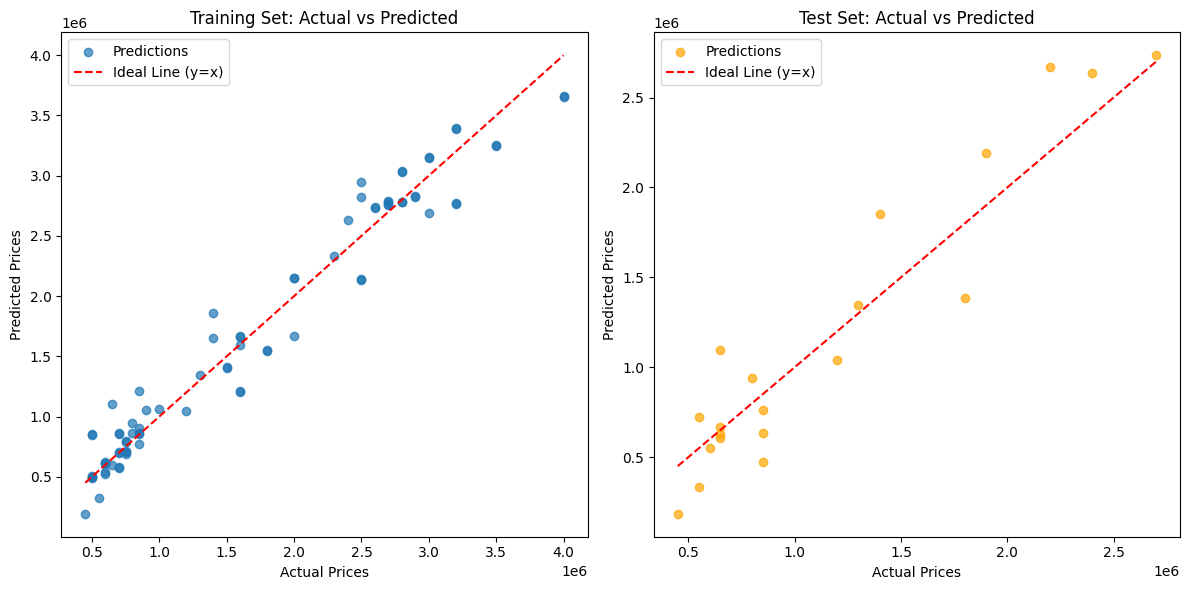

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label="Ideal Line (y=x)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training Set: Actual vs Predicted")
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Line (y=x)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Set: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()


Графік тренувального набору:
Більшість передбачень лежать близько до червоної лінії
y=x, що відповідає ідеальній відповідності.
Є деякі розкидані точки, які свідчать про недоліки моделі у відображенні всіх складних взаємозв'язків у даних.

Графік тестувального набору:
Розсіювання трохи більше, ніж у тренувальному наборі, що свідчить про те, що модель менш точно прогнозує на нових даних.
Однак загальна тенденція передбачень відповідає фактичним значенням, що є позитивним знаком.

Значення RMSE свідчать про те, що модель прогнозує ціни з середньою похибкою у вказаних межах.
Більший RMSE на тестовому наборі вказує на те, що модель може бути недостатньо узагальненою або впливати на перенавчання.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

linear_regressor_scaled = LinearRegression()
linear_regressor_scaled.fit(X_train_scaled, y_train)

coefficients = linear_regressor_scaled.coef_

feature_importance = pd.DataFrame({
    'Feature': X_train_numeric.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance


,Feature,Coefficient
7,Power,496769.214899
10,Brand_Ford,-334761.655121
12,Brand_Hyundai,-332815.861280
16,Brand_Tata,-292649.105520
13,Brand_Mahindra,-290310.207388
18,Brand_Volkswagen,-286620.547297
14,Brand_Maruti,-278152.872913
11,Brand_Honda,-228645.911279
17,Brand_Toyota,-189794.446257
3,Fuel_Type,-183848.018909


Power: Найвпливовіша змінна з коефіцієнтом
Позитивний коефіцієнт означає, що збільшення потужності двигуна значно підвищує ціну автомобіля.

Fuel_Type: Негативне значення свідчить, що певний тип пального (ймовірно, дизель) зменшує ціну порівняно з іншим типом (бензин).

Mileage: Негативний напрямок є логічним, оскільки вищий пробіг знижує вартість автомобіля.

Transmission: Позитивний вплив автоматичної трансмісії на ціну автомобіля відповідає очікуванням.

Engine: Відносно невеликий негативний коефіцієнт вказує на помірний вплив розміру двигуна.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [45]:
import statsmodels.api as sm

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_train_scaled_with_constant = sm.add_constant(X_train_scaled_df)
model = sm.OLS(y_train, X_train_scaled_with_constant).fit()
summary = model.summary()
p_values = model.pvalues
significant_features = p_values[p_values < 0.05]

print(summary)
print("Significant Features:")
print(significant_features)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        19:37:08   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

const: Константа моделі, що враховує базове значення, коли всі предиктори рівні нулю.

Fuel_Type: Тип пального впливає на ціну.

Transmission: Тип трансмісії має значний вплив.

Mileage: Пробіг автомобіля є помірно значущим.

Power: Потужність двигуна є найбільш значущою ознакою.


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [49]:
selected_features = ['const', 'Fuel_Type', 'Transmission', 'Mileage', 'Power']

X_train_selected = X_train_scaled_df[['Fuel_Type', 'Transmission', 'Mileage', 'Power']]
X_train_selected_with_constant = sm.add_constant(X_train_selected)

model_selected = sm.OLS(y_train, X_train_selected_with_constant).fit()

summary_selected = model_selected.summary()

print(summary_selected)



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     77.42
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           7.36e-26
Time:                        19:52:08   Log-Likelihood:                -1156.0
No. Observations:                  80   AIC:                             2322.
Df Residuals:                      75   BIC:                             2334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.68e+06   5.27e+04     31.871   

Модель пояснює 80.5% варіації в цільовій змінній за допомогою значущих ознак.
Скориговане значення R-squared 79.5% зменшує вплив кількості ознак і також є високим.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [50]:
selected_features_p25 = p_values[p_values < 0.25].index.drop('const')

X_train_p25 = X_train_scaled_df[selected_features_p25]
X_train_p25_with_constant = sm.add_constant(X_train_p25)

model_p25 = sm.OLS(y_train, X_train_p25_with_constant).fit()

summary_p25 = model_p25.summary()


print(summary_p25)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.23e-40
Time:                        19:56:10   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2217.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.61e+0

Для практичного використання модель із
p<0.25, якщо потрібна максимальна точність і модель буде застосовуватись на схожих даних.
Для інтерпретації та узагальнення модель із
p<0.05, оскільки вона проста й менш схильна до перенавчання